In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')





/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


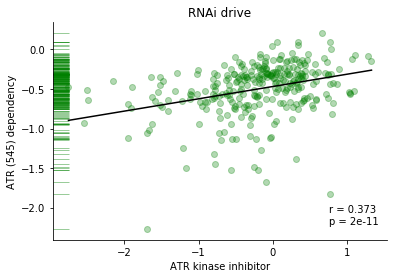

<Figure size 432x288 with 0 Axes>

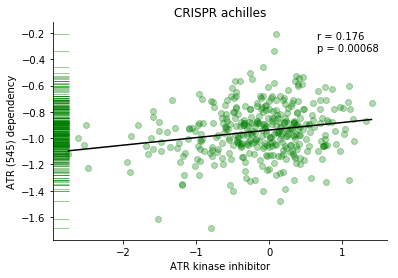

In [2]:
##########################################################################################
######################################### point 1 ########################################
##########################################################################################

#ATR

# get drug data
ctd_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='ctd_matrix')
sanger_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='sanger_matrix')
prism_matrix = tc.get(name='aneuploidy-data-d0b9', version=7, file='secondary_matrix')

primary_replicate_collapsed_logfold_change = tc.get(name='primary-screen-e5c7', version=8, file='primary_replicate_collapsed_logfold_change')
primary_replicate_collapsed_treatment_info = tc.get(name='primary-screen-e5c7', version=8, file='primary_replicate_collapsed_treatment_info')
primary_replicate_treatment_info = tc.get(name='primary-screen-e5c7', version=8, file='primary_replicate_treatment_info')


# switch to arxspan IDs
sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')
sample_info.index = sample_info.loc[:,'CCLE_Name'] 
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]
sample_info_ = sample_info.copy()
sample_info_.index = sample_info_.loc[:,'DepMap_ID']

gene_effect_rnai_achilles.index = sample_info.loc[gene_effect_rnai_achilles.index,'DepMap_ID']
gene_effect_rnai_drive.index = sample_info.loc[gene_effect_rnai_drive.index,'DepMap_ID']


import scipy


gene='ATR (545)'
d1 = 'BRD-K26756394-001-02-2'

drug = primary_replicate_collapsed_treatment_info[primary_replicate_collapsed_treatment_info.loc[:,'broad_id'] == d1].loc[:,'column_name']

drug = drug.values[0]

fig,ax = plt.subplots()
shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_rnai_drive.loc[:,gene].dropna().index)
plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
           gene_effect_rnai_drive.loc[shared,gene],alpha=.3,color='green',label=None)

plt.xlabel('ATR kinase inhibitor')
plt.ylabel(gene + ' dependency')
plotting.simpleaxis()


plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_rnai_drive.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')
sns.rugplot(gene_effect_rnai_drive.loc[shared,gene],vertical=True,alpha=.4,color='green')


plt.title('RNAi drive')

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,11)),frameon=False,loc='lower right')

# plt.savefig('review_plots/' +gene.split(' ')[0]+ '_rnai_drive_SPEARMAN.pdf')

#########################################################
plt.figure()




drug = primary_replicate_collapsed_treatment_info[primary_replicate_collapsed_treatment_info.loc[:,'broad_id'] == d1].loc[:,'column_name']

drug = drug.values[0]

fig,ax = plt.subplots()
shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_crispr_achilles.loc[:,gene].dropna().index)
plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
           gene_effect_crispr_achilles.loc[shared,gene],alpha=.3,color='green',label=None)

plt.xlabel('ATR kinase inhibitor')
plt.ylabel(gene + ' dependency')
plotting.simpleaxis()


plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_crispr_achilles.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')
sns.rugplot(gene_effect_crispr_achilles.loc[shared,gene],vertical=True,alpha=.4,color='green')


plt.title('CRISPR achilles')

r,p = scipy.stats.spearmanr(gene_effect_crispr_achilles.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,5)),frameon=False)


# plt.savefig('review_plots/' + gene.split(' ')[0]+ '_crispr_achilles_SPEARMAN.pdf')





No handles with labels found to put in legend.
No handles with labels found to put in legend.


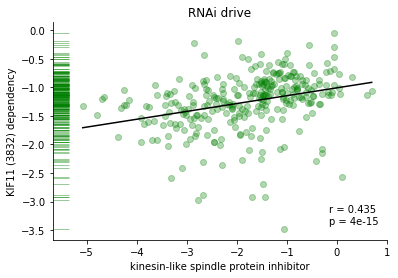

<Figure size 432x288 with 0 Axes>

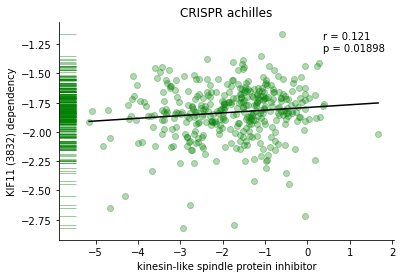

In [3]:
### KIF11 ###

gene='KIF11 (3832)'
d1 = 'BRD-A67748489-001-10-0'

drug = primary_replicate_collapsed_treatment_info[primary_replicate_collapsed_treatment_info.loc[:,'broad_id'] == d1].loc[:,'column_name']

drug = drug.values[0]

fig,ax = plt.subplots()
shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_rnai_drive.loc[:,gene].dropna().index)
plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
           gene_effect_rnai_drive.loc[shared,gene],alpha=.3,color='green',label=None)

plt.xlabel('kinesin-like spindle protein inhibitor')
plt.ylabel(gene + ' dependency')
plotting.simpleaxis()

sns.rugplot(gene_effect_rnai_drive.loc[shared,gene],vertical=True,alpha=.4,color='green')
plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_rnai_drive.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

plt.title('RNAi drive')

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,15)),frameon=False,loc='lower right')

# plt.savefig('review_plots/' +gene.split(' ')[0]+ '_rnai_drive_SPEARMAN.pdf')

#########################################################
plt.figure()


import scipy


drug = primary_replicate_collapsed_treatment_info[primary_replicate_collapsed_treatment_info.loc[:,'broad_id'] == d1].loc[:,'column_name']

drug = drug.values[0]

fig,ax = plt.subplots()
shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_crispr_achilles.loc[:,gene].dropna().index)
plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
           gene_effect_crispr_achilles.loc[shared,gene],alpha=.3,color='green',label=None)
sns.rugplot(gene_effect_crispr_achilles.loc[shared,gene],vertical=True,alpha=.4,color='green')


plt.xlabel('kinesin-like spindle protein inhibitor')
plt.ylabel(gene + ' dependency')
plotting.simpleaxis()


plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_crispr_achilles.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

plt.title('CRISPR achilles')

r,p = scipy.stats.spearmanr(gene_effect_crispr_achilles.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,5)),frameon=False)


# plt.savefig('review_plots/' +gene.split(' ')[0]+ '_crispr_achilles_SPEARMAN.pdf')





No handles with labels found to put in legend.
No handles with labels found to put in legend.


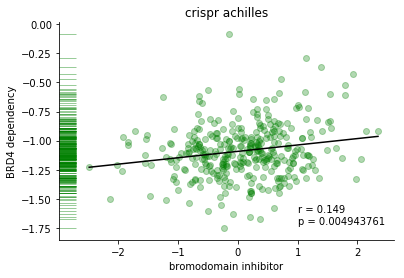

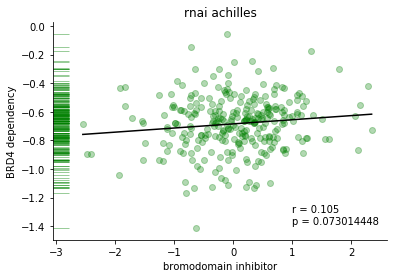

In [5]:
### BRD4 ###


gene_effect_rnai_achilles_ =  gene_effect_rnai_achilles.copy()
gene_effect_rnai_drive_ = gene_effect_rnai_drive.copy()
gene_effect_crispr_achilles_ = gene_effect_crispr_achilles.copy()

# strip additional IDs off genes
gene_effect_rnai_achilles_.columns = gene_effect_rnai_achilles_.columns.str.split(' ').str[0]
gene_effect_rnai_drive_.columns = gene_effect_rnai_drive_.columns.str.split(' ').str[0]
gene_effect_crispr_achilles_.columns = gene_effect_crispr_achilles_.columns.str.split(' ').str[0]


brd4s = []
primary_replicate_collapsed_treatment_info
for x in primary_replicate_collapsed_treatment_info.loc[:,'target'].index:
    if x==None:
        continue
    if  primary_replicate_collapsed_treatment_info.iloc[x].loc['target'] != None:
        if 'BRD4' in primary_replicate_collapsed_treatment_info.iloc[x].loc['target']:
            brd4s.append(x)


gene='BRD4'
i=0
for drug in primary_replicate_collapsed_treatment_info.iloc[brd4s].loc[:,'column_name']:
    fig,ax = plt.subplots()
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_crispr_achilles_.loc[:,gene].dropna().index)
    plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
        gene_effect_crispr_achilles_.loc[shared,gene],alpha=.3,color='green',label=None)

    plt.ylabel(gene + ' dependency')
    #plt.xlabel('drug targeting BRD4')
    plt.xlabel(primary_replicate_collapsed_treatment_info.iloc[brd4s[i]].loc['moa'])
    plotting.simpleaxis()

    sns.rugplot(gene_effect_crispr_achilles_.loc[shared,gene],vertical=True,alpha=.4,color='green')
    plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_crispr_achilles_.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

    plt.title('crispr achilles')

    r,p = scipy.stats.spearmanr(gene_effect_crispr_achilles_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
    ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,9)),frameon=False,loc='lower right')

    i+=1
    break # only looking at first one

    


gene='BRD4'
i=0
for drug in primary_replicate_collapsed_treatment_info.iloc[brd4s].loc[:,'column_name']:
    fig,ax = plt.subplots()
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_rnai_achilles_.loc[:,gene].dropna().index)
    plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
        gene_effect_rnai_achilles_.loc[shared,gene],alpha=.3,color='green',label=None)

    plt.ylabel(gene + ' dependency')
    #plt.xlabel('drug targeting BRD4')
    plt.xlabel(primary_replicate_collapsed_treatment_info.iloc[brd4s[i]].loc['moa'])
    plotting.simpleaxis()

    sns.rugplot(gene_effect_rnai_achilles_.loc[shared,gene],vertical=True,alpha=.4,color='green')
    plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_rnai_achilles_.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

    plt.title('rnai achilles')

    r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
    ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,9)),frameon=False,loc='lower right')

    i+=1
    break

    



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


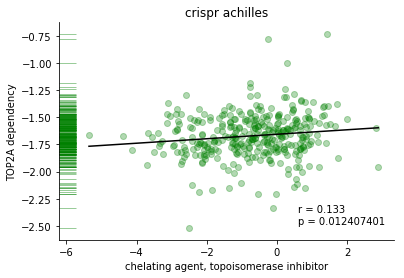

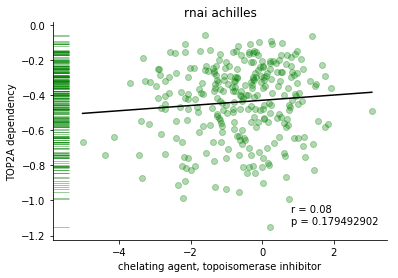

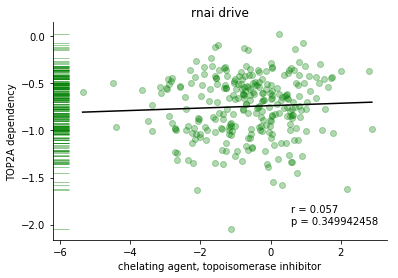

In [7]:
### TOP2A ###

gene='TOP2A'

top2as = []

for x in primary_replicate_collapsed_treatment_info.loc[:,'target'].index:
    if x==None:
        continue
    if  primary_replicate_collapsed_treatment_info.iloc[x].loc['target'] != None:
        if 'TOP2A' in primary_replicate_collapsed_treatment_info.iloc[x].loc['target']:
            top2as.append(x)
good_top2as = []
iss = []
gene='TOP2A'
i=0
for drug in primary_replicate_collapsed_treatment_info.iloc[top2as].loc[:,'column_name']:
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_crispr_achilles_.loc[:,gene].dropna().index)

    r,p = scipy.stats.pearsonr(gene_effect_crispr_achilles_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])

    if r >=.1:
        good_top2as.append(drug)
        iss.append(i)
    i+=1




i=0
for drug in good_top2as:
    fig,ax = plt.subplots()
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_crispr_achilles_.loc[:,gene].dropna().index)
    plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
        gene_effect_crispr_achilles_.loc[shared,gene],alpha=.3,color='green',label=None)

    plt.ylabel(gene + ' dependency')
    #plt.xlabel('drug targeting top2a')
    plt.xlabel(primary_replicate_collapsed_treatment_info.iloc[top2as[iss[i]]].loc['moa'])
    plotting.simpleaxis()

    sns.rugplot(gene_effect_crispr_achilles_.loc[shared,gene],vertical=True,alpha=.4,color='green')
    plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_crispr_achilles_.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

    plt.title('crispr achilles')

    r,p = scipy.stats.spearmanr(gene_effect_crispr_achilles_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
    ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,9)),frameon=False,loc='lower right')

    i+=1
    break

    


gene='TOP2A'
i=0
for drug in good_top2as:
    fig,ax = plt.subplots()
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_rnai_achilles_.loc[:,gene].dropna().index)
    plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
        gene_effect_rnai_achilles_.loc[shared,gene],alpha=.3,color='green',label=None)

    plt.ylabel(gene + ' dependency')
    #plt.xlabel('drug targeting top2a')
    plt.xlabel(primary_replicate_collapsed_treatment_info.iloc[top2as[iss[i]]].loc['moa'])
    plotting.simpleaxis()

    sns.rugplot(gene_effect_rnai_achilles_.loc[shared,gene],vertical=True,alpha=.4,color='green')
    plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_rnai_achilles_.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

    plt.title('rnai achilles')

    r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
    ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,9)),frameon=False,loc='lower right')

    i+=1
    break

    



gene='TOP2A'
i=0
for drug in good_top2as:
    fig,ax = plt.subplots()
    shared = set(primary_replicate_collapsed_logfold_change.loc[:,drug].dropna().index & gene_effect_rnai_drive_.loc[:,gene].dropna().index)
    plt.scatter(primary_replicate_collapsed_logfold_change.loc[shared,drug],
        gene_effect_rnai_drive_.loc[shared,gene],alpha=.3,color='green',label=None)

    plt.ylabel(gene + ' dependency')
    #plt.xlabel('drug targeting top2a')
    plt.xlabel(primary_replicate_collapsed_treatment_info.iloc[top2as[iss[i]]].loc['moa'])
    plotting.simpleaxis()

    sns.rugplot(gene_effect_rnai_drive_.loc[shared,gene],vertical=True,alpha=.4,color='green')
    plt.plot(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug]), np.poly1d(np.polyfit(primary_replicate_collapsed_logfold_change.loc[shared,drug],  gene_effect_rnai_drive_.loc[shared,gene], 1))(np.unique(primary_replicate_collapsed_logfold_change.loc[shared,drug])),color='black')

    plt.title('rnai drive')

    r,p = scipy.stats.spearmanr(gene_effect_rnai_drive_.loc[shared,gene],primary_replicate_collapsed_logfold_change.loc[shared,drug])
    ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,9)),frameon=False,loc='lower right')

    #i+=1
    break

    





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.1086449383190131        p = 0.08647431531960485
MAD2L1 dependency and expression : r = 0.25749570393126286        p = 3.777916219837668e-05
BUB1B dependency and expression : r = 0.14399236335709414        p = 0.015709570569801202
MAD2L1 dependency and expression : r = 0.23999502428365901        p = 4.809875577189081e-05


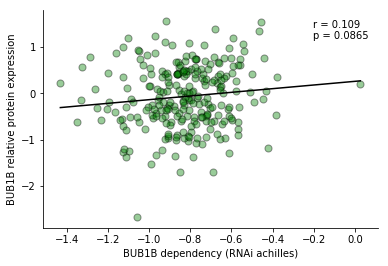

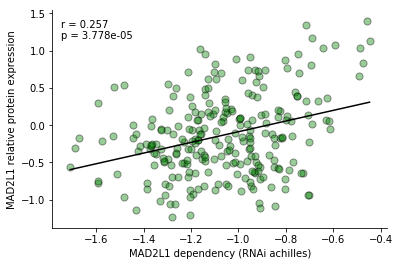

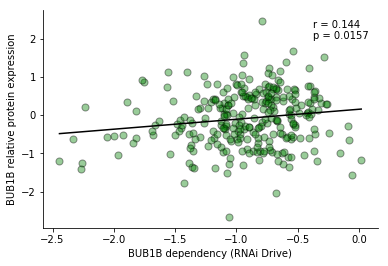

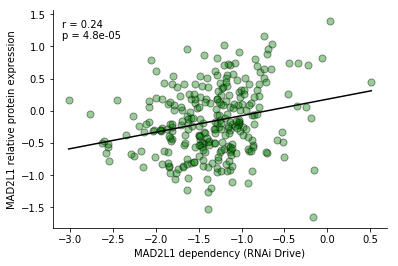

In [15]:
##########################################################################################
######################################### point 3 ########################################
##########################################################################################


### protein data ###

# look at protein data 


protein_quant_current_normalized = tc.get(name='total-proteome--5c50', version=1, file='protein_quant_current_normalized')
protein_quant_current_normalized.index = protein_quant_current_normalized.loc[:,'Gene_Symbol']
protein_quant_current_normalized.columns = protein_quant_current_normalized.columns.str.split('_Ten').str[0]
protein_quant_current_normalized = protein_quant_current_normalized.loc[:,'MDAMB468_BREAST':].T
protein_quant_current_normalized = protein_quant_current_normalized[~protein_quant_current_normalized.index.duplicated(keep=False)]


gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')




shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_achilles.index) 
without_na = shared#gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi achilles)')
plt.ylabel('BUB1B relative protein expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)





fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi achilles)')
plt.ylabel('MAD2L1 relative protein expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



### drive dataset


shared = set(protein_quant_current_normalized.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], protein_quant_current_normalized.loc[without_na,'BUB1B'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B relative protein expression')
plotting.simpleaxis(ax)

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],protein_quant_current_normalized.loc[without_na,'BUB1B'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], protein_quant_current_normalized.loc[without_na,'MAD2L1'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 relative protein expression')
plotting.simpleaxis(ax)

r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],protein_quant_current_normalized.loc[without_na,'MAD2L1'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)









/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.26126871950133174
p-value for MAD2L1: 0.0012271722567593936


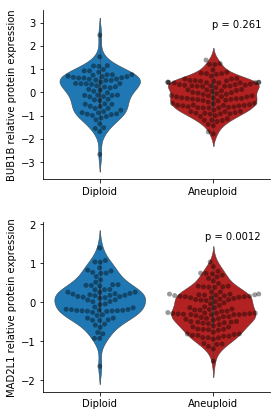

In [16]:
### violin plots protein data


fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot_CCLE.index) & set(protein_quant_current_normalized.index)
temp = protein_quant_current_normalized.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



sns.violinplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B relative protein expression')
axx[1].set_ylabel('MAD2L1 relative protein expression')



from scipy import stats
tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'BUB1B'],protein_quant_current_normalized.loc[falsee,'BUB1B'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(protein_quant_current_normalized.loc[trus,'MAD2L1'],protein_quant_current_normalized.loc[falsee,'MAD2L1'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)


plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()




/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


p-value for BUB1B: 0.523804002726536
p-value for MAD2L1: 0.3970578717473404


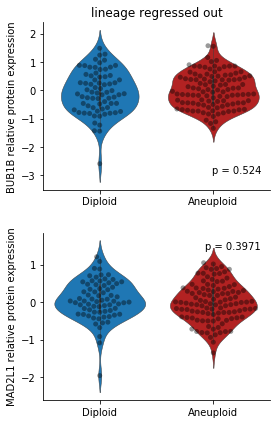

In [17]:
### violin plots but with lineage regressed out ### 

protein_quant_current_normalized_ = protein_quant_current_normalized.loc[:,['BUB1B','MAD2L1']]

# want to regress out lineage first from the expression data

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[protein_quant_current_normalized.index,'lineage'])
mu = protein_quant_current_normalized_.mean()
reg = LinearRegression().fit(one_hot, protein_quant_current_normalized_)
preds = pd.DataFrame(reg.predict(one_hot),index = protein_quant_current_normalized_.index,columns = protein_quant_current_normalized_.columns)

preds_ = preds 
corrected_protein = ((protein_quant_current_normalized_  - mu)- preds_)+ mu


fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot_CCLE.index) & set(corrected_protein.index)
temp = corrected_protein.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'




sns.violinplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],saturation=1,linewidth=.5,ax=axx[0],order=my_order,palette = my_pal)
sns.swarmplot(y = 'BUB1B',x='ploidy', data = temp.loc[:,['BUB1B', 'ploidy']],color='black',alpha=.4,ax=axx[0],order=my_order)


sns.violinplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],saturation=1,linewidth=.5,ax=axx[1],order=my_order,palette = my_pal)
sns.swarmplot(y = 'MAD2L1',x='ploidy', data = temp.loc[:,['MAD2L1', 'ploidy']],color='black',alpha=.4,ax=axx[1],order=my_order)

axx[0].set_xlabel('')
axx[1].set_xlabel('')

axx[0].set_ylabel('BUB1B relative protein expression')
axx[1].set_ylabel('MAD2L1 relative protein expression')



from scipy import stats
tt,p_val = stats.ttest_ind(corrected_protein.loc[trus,'BUB1B'],corrected_protein.loc[falsee,'BUB1B'])
print('p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(corrected_protein.loc[trus,'MAD2L1'],corrected_protein.loc[falsee,'MAD2L1'])
print('p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)


axx[0].set_title('lineage regressed out')


plotting.simpleaxis(axx[0])
plotting.simpleaxis(axx[1])
plt.tight_layout()



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

skin_Diploid v.s. skin_Aneuploid: t-test independent samples, P_val=5.319e-01 stat=-6.374e-01
breast_Diploid v.s. breast_Aneuploid: t-test independent samples, P_val=7.611e-02 stat=1.857e+00
soft_tissue_Diploid v.s. soft_tissue_Aneuploid: t-test independent samples, P_val=3.933e-01 stat=8.855e-01
uterus_Diploid v.s. uterus_Aneuploid: t-test independent samples, P_val=2.075e-01 stat=1.300e+00
gastric_Diploid v.s. gastric_Aneuploid: t-test independent samples, P_val=2.092e-01 stat=1.295e+00
central
nervous
system_Diploid v.s. central
nervous
system_Aneuploid: t-test independent samples, P_val=8.118e-01 stat=2.403e-01
lung_Diploid v.s. lung_Aneuploid: t-test independent samples, P_val=8.839e-01 stat=-1.464e-01
blood_Diploid v.s. blood_Aneuploid: t-test independent samples, P_val=6.412e-01 stat=4.688e-01
ovary_Diploid v.s. ovary

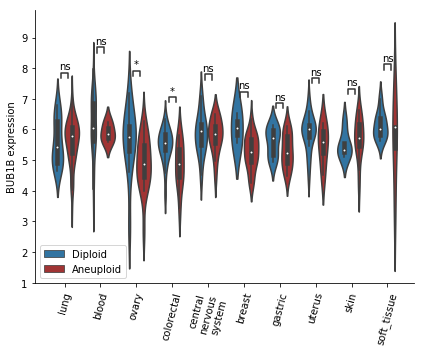

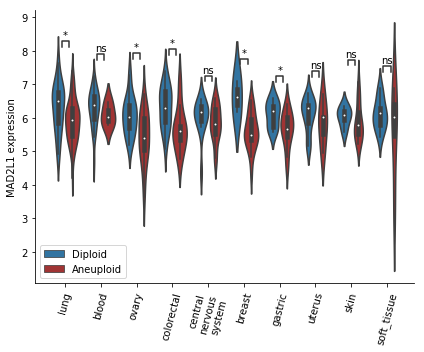

In [21]:
### violin plots lineage ###


# can be tweaked do only look at specific lineages

public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

shared = set(anot_CCLE.index) & set(public_19Q4_proteincoding_tpm_.index) 


drive_box = public_19Q4_proteincoding_tpm_.loc[shared]#gene_effect_rnai_drive.loc[shared]

drive_box['lineage'] = sample_info.loc[drive_box.index,'lineage']


drive_box['ploidy'] = anot_CCLE.loc[drive_box.index,'many_arm_events']

trus = drive_box[drive_box.loc[:,'ploidy']==True].index 
drive_box.loc[trus,'ploidy']= 'Aneuploid'
falsee = drive_box[drive_box.loc[:,'ploidy']==False].index 
drive_box.loc[falsee,'ploidy']=  'Diploid'

#only lineages we want

to_drop = []

for x in drive_box.index:
    if  drive_box.loc[x,'lineage'] != 'lung' \
        and drive_box.loc[x,'lineage'] != 'blood' and drive_box.loc[x,'lineage'] != 'gastric' \
        and drive_box.loc[x,'lineage'] != 'uterus' and drive_box.loc[x,'lineage'] != 'ovary' \
        and drive_box.loc[x,'lineage'] != 'colorectal'  and drive_box.loc[x,'lineage'] != 'central_nervous_system' \
        and drive_box.loc[x,'lineage'] != 'breast' and drive_box.loc[x,'lineage'] != 'skin' and drive_box.loc[x,'lineage'] != 'soft_tissue':
            to_drop.append(x)
            
drive_box_ = drive_box.drop(to_drop)
drive_box_ = drive_box_.replace('central_nervous_system','central\nnervous\nsystem')

lin_order = ['lung','blood','ovary','colorectal','central\nnervous\nsystem','breast','gastric','uterus','skin','soft_tissue' ]
##########################################################################################################
l_order = list(set(drive_box_.loc[:,'lineage']))

plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="BUB1B (701)", hue="ploidy",
                     data=drive_box_ ,palette = my_pal,order = lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

new_pairs = []

for lin in set(drive_box_['lineage'].values):
    #print(lin)
    new_pairs.append(((lin,'Diploid'),(lin,'Aneuploid')))

width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='BUB1B (701)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)




plt.xticks(rotation=75) 
plt.ylabel('BUB1B expression')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()


plt.subplots(figsize=(6,5))

ax = sns.violinplot(x="lineage", y="MAD2L1 (4085)", hue="ploidy",
                     data=drive_box_,palette = my_pal,order=lin_order,hue_order=['Diploid','Aneuploid'])#palette="muted")

width = 0.4
add_stat_annotation(ax, data=drive_box_, x='lineage', y='MAD2L1 (4085)', hue='ploidy', width=width,
                    box_pairs=new_pairs, test='t-test_ind', loc='inside', verbose=2,order=lin_order)


plt.xticks(rotation=75) 
plt.ylabel('MAD2L1 expression')
plt.xlabel('')


plotting.simpleaxis(ax)
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:], labels=labels[0:],loc='lower left')
plt.tight_layout()





6

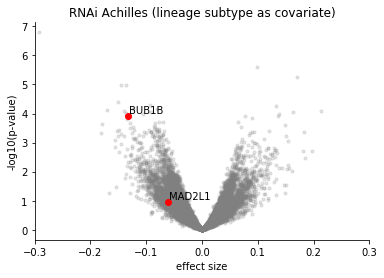

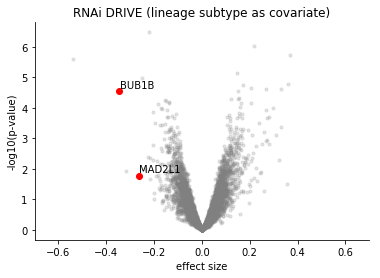

In [22]:
##########################################################################################
######################################### point 4 ########################################
##########################################################################################


### molecular subtypes ###

drive = pd.read_csv('sub_lineage/lim_res_rnai_drive_sublineage_NEW.csv',index_col=0)
rnai = pd.read_csv('sub_lineage/lim_res_rnai_achilles_sublineage_NEW.csv',index_col=0)


from adjustText import adjust_text
from cds import plotting

fix,ax = plt.subplots()
plt.scatter(rnai.loc[:,'EffectSize'],-np.log10(rnai.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(rnai.loc['BUB1B (701)','EffectSize'],-np.log10(rnai.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(rnai.loc['MAD2L1 (4085)','EffectSize'],-np.log10(rnai.loc['MAD2L1 (4085)','p.value']),color='red')


plt.xlim(-.3,.3)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Achilles (lineage subtype as covariate)')
plotting.simpleaxis(ax)

texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)']):#,'KIF18A (81930)']):
    texts.append(plt.text(rnai.loc[txt,'EffectSize'], -np.log10(rnai.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)

fix,ax = plt.subplots()
plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')


plt.xlim(-.7,.7)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi DRIVE (lineage subtype as covariate)')
plotting.simpleaxis(ax)


texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)']):#,'KIF18A (81930)']):
    texts.append(plt.text(drive.loc[txt,'EffectSize'], -np.log10(drive.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels fou

RNAi Achilles p-value for BUB1B: 0.0006557219644702226
RNAi Achilles p-value for MAD2L1: 0.028731287481339785
RNAi Achilles p-value for BUB1B: 0.0029886597768969594
RNAi Achilles p-value for MAD2L1: 0.08959416465478602


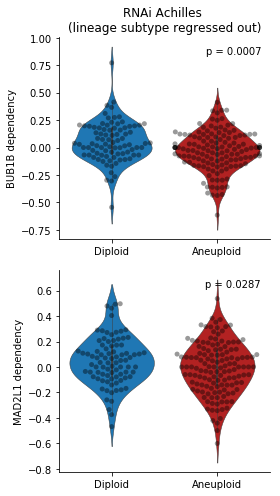

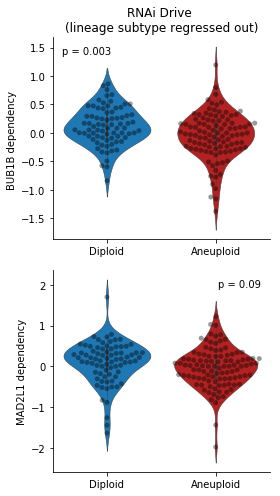

In [26]:
### sub-lineage regessed out ###

from scipy import stats
fig,axx = plt.subplots(2,1,figsize=(4,7))

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

genes = ['BUB1B (701)','MAD2L1 (4085)']
gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes].dropna()
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes].dropna()

enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_achilles.index,'lineage_subtype'])
mu = gene_effect_rnai_achilles_.mean()
reg = LinearRegression().fit(one_hot, gene_effect_rnai_achilles_)
preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_achilles_.index,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles = ((gene_effect_rnai_achilles_  - mu)- preds_)+ mu



enc = OneHotEncoder(handle_unknown='ignore')

one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_drive_.index,'lineage_subtype'])
mu = gene_effect_rnai_drive_.mean()
reg = LinearRegression().fit(one_hot, gene_effect_rnai_drive_)
preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_drive_.index,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive = ((gene_effect_rnai_drive_ - mu) - preds_)+ mu





shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles.index)
temp = corrected_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles \n(lineage subtype regressed out)')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()


tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'BUB1B (701)'],corrected_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)





fig,axx = plt.subplots(2,1,figsize=(4,7))
shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive.index)
temp = corrected_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive \n(lineage subtype regressed out)')
axx[0].set_ylabel('BUB1B dependency ')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'BUB1B (701)'],corrected_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


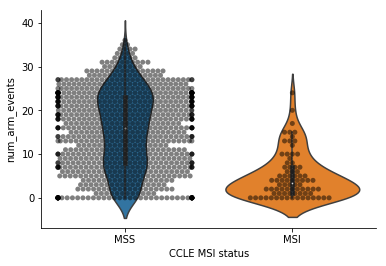

In [31]:
### MSI/MSS ###

msi = pd.read_csv('Chan_et_al_2019_Supplementary_Table_1.csv',index_col='CCLE_ID')

temp = pd.DataFrame(anot_CCLE.loc[:,'num_arm_events'])



msi.loc[temp.index,'CCLE_MSI'].replace('indeterminate',float('NaN'))

temp['MSI'] = msi.loc[temp.index,'CCLE_MSI'].replace('indeterminate',float('NaN'))

sns.violinplot(x='MSI',y='num_arm_events', data=temp)
sns.swarmplot(x='MSI',y='num_arm_events', data=temp,alpha=.5,color='black')
plt.xlabel('CCLE MSI status')
plotting.simpleaxis()



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels fou

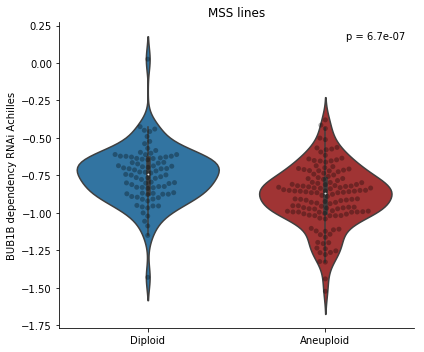

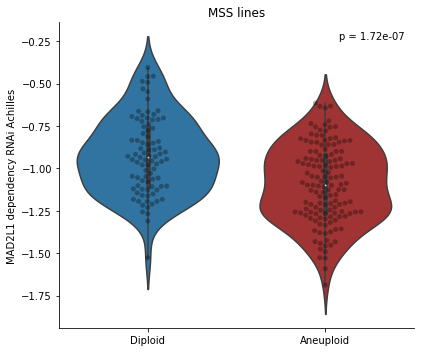

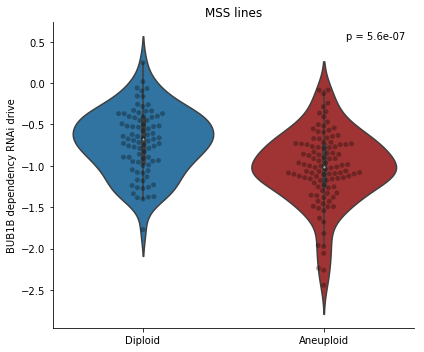

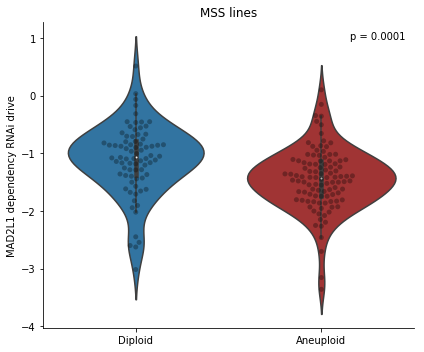

In [33]:
# achilles
from scipy import stats
from statannot import add_stat_annotation
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles.index)
temp = gene_effect_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

gene_effect_rnai_achilles['MSI'] = msi.loc[temp.index,'CCLE_MSI'].replace('indeterminate',float('NaN'))



trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

plt.subplots(figsize=(6,5))

ax = sns.violinplot( y="BUB1B (701)", x="ploidy",
                     data=temp ,palette = my_pal,order=['Diploid','Aneuploid'])#palette="muted")

ax = sns.swarmplot( y="BUB1B (701)", x="ploidy",
                     data=temp ,order=['Diploid','Aneuploid'],color='black',alpha=.3)#palette="muted")

plt.xlabel('')

tt,p_val = stats.ttest_ind(temp.loc[trus,'BUB1B (701)'].dropna(),temp.loc[falsee,'BUB1B (701)'].dropna())
ax.legend(title='p = '+ str(round(p_val,8)),frameon=False)

plotting.simpleaxis()
plt.ylabel('BUB1B dependency RNAi Achilles')
plt.title('MSS lines')
plt.tight_layout()



plt.subplots(figsize=(6,5))

ax = sns.violinplot( y="MAD2L1 (4085)", x="ploidy",
                     data=temp ,palette = my_pal,order=['Diploid','Aneuploid'])#palette="muted")

ax = sns.swarmplot( y="MAD2L1 (4085)", x="ploidy",
                     data=temp ,order=['Diploid','Aneuploid'],color='black',alpha=.3)#palette="muted")

plt.xlabel('')

tt,p_val = stats.ttest_ind(temp.loc[trus,'MAD2L1 (4085)'].dropna(),temp.loc[falsee,'MAD2L1 (4085)'].dropna())
ax.legend(title='p = '+ str(round(p_val,9)),frameon=False)

plotting.simpleaxis()
plt.ylabel('MAD2L1 dependency RNAi Achilles')
plt.title('MSS lines')
plt.tight_layout()




shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

gene_effect_rnai_drive['MSI'] = msi.loc[temp.index,'CCLE_MSI'].replace('indeterminate',float('NaN'))



trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

plt.subplots(figsize=(6,5))

ax = sns.violinplot( y="BUB1B (701)", x="ploidy",
                     data=temp ,palette = my_pal,hue_order=['Diploid','Aneuploid'])#palette="muted")

ax = sns.swarmplot( y="BUB1B (701)", x="ploidy",
                     data=temp ,hue_order=['Diploid','Aneuploid'],color='black',alpha=.3)#palette="muted")

plt.xlabel('')

tt,p_val = stats.ttest_ind(temp.loc[trus,'BUB1B (701)'].dropna(),temp.loc[falsee,'BUB1B (701)'].dropna())
ax.legend(title='p = '+ str(round(p_val,8)),frameon=False)

plotting.simpleaxis()
plt.ylabel('BUB1B dependency RNAi drive')
plt.title('MSS lines')
plt.tight_layout()



plt.subplots(figsize=(6,5))

ax = sns.violinplot( y="MAD2L1 (4085)", x="ploidy",
                     data=temp ,palette = my_pal,hue_order=['Diploid','Aneuploid'])#palette="muted")

ax = sns.swarmplot( y="MAD2L1 (4085)", x="ploidy",
                     data=temp ,hue_order=['Diploid','Aneuploid'],color='black',alpha=.3)#palette="muted")

plt.xlabel('')

tt,p_val = stats.ttest_ind(temp.loc[trus,'MAD2L1 (4085)'].dropna(),temp.loc[falsee,'MAD2L1 (4085)'].dropna())
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)

plotting.simpleaxis()
plt.ylabel('MAD2L1 dependency RNAi drive')
plt.title('MSS lines')
plt.tight_layout()


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` in

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Aneuploid v.s. PTEN_Diploid: t-test independent samples, P_val=1.494e-04 stat=-3.892e+00
CTCF_Aneuploid v.s. CTCF_Diploid: t-test independent samples, P_val=4.716e-05 stat=-4.185e+00
ARID1A_Aneuploid v.s. ARID1A_Diploid: t-test independent samples, P_val=8.042e-04 stat=-3.427e+00
RNF43_Aneuploid v.s. RNF43_Diploid: t-test independent samples, P_val=2.383e-05 stat=-4.358e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

PTEN_Aneuploid v.s. PTEN_Diploid: t-test independent samples, P_val=1.149e-03 stat=-3.315e+00
CTCF_Aneuploid v.s. CTCF_Diploid: t-test independent samples, P_val=1.269e-03 stat=-3.282e+00
ARID1A_Aneuploid v.s. ARID1A_Diploid: t-test independent samples, P_val=1.923e-04 stat=-3.831e+00
RNF4

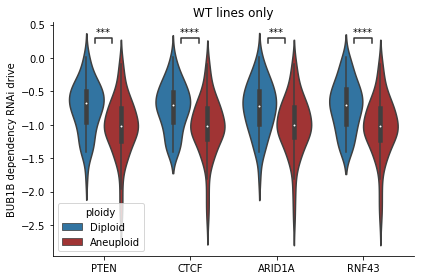

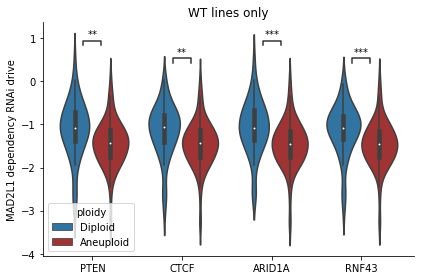

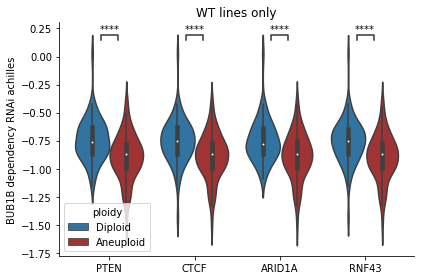

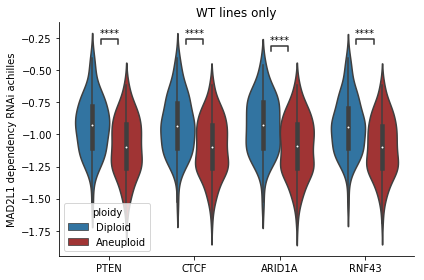

In [39]:
### WT status ###


damaging_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='damaging_mutation')
depmap_19Q4_mutation_calls = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='depmap_19Q4_mutation_calls')
hotspot_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='hotspot_mutation')
other_mutation = tc.get(name='depmap-mutation-calls-9a1a', version=14, file='other_mutation')



ARID1A = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'ARID1A']
CTCF = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'CTCF']
PTEN = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'PTEN']
RNF43 = depmap_19Q4_mutation_calls[depmap_19Q4_mutation_calls.loc[:,'Hugo_Symbol'] == 'RNF43']

all_lines = set(damaging_mutation.index) | set(hotspot_mutation.index) | set(other_mutation.index)
all_columns = set(damaging_mutation.columns) | set(hotspot_mutation.columns) | set(other_mutation.columns)

summed = damaging_mutation.loc[all_lines,all_columns].replace(float('nan'),0) + hotspot_mutation.loc[all_lines,all_columns].replace(float('nan'),0) + other_mutation.loc[all_lines,all_columns].replace(float('nan'),0)
summed = summed.replace(float('nan'),0)
summed.columns = summed.columns.str.split(' ').str[0]


ARID1A_wt_ = pd.Series('ARID1A',index=summed[summed.loc[:,'ARID1A'] == 0].index,)
CTCF_wt_ = pd.Series('CTCF',index=summed[summed.loc[:,'CTCF'] == 0].index)
PTEN_wt_ = pd.Series('PTEN',index=summed[summed.loc[:,'PTEN'] == 0].index)
RNF43_wt_ = pd.Series('RNF43',index=summed[summed.loc[:,'RNF43'] == 0].index)


alls_ = pd.concat([ARID1A_wt_,CTCF_wt_])
alls_ = pd.concat([alls_,PTEN_wt_])
alls_ = pd.concat([alls_,RNF43_wt_])

lines =  set(depmap_19Q4_mutation_calls.index)



gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.copy()
gene_effect_rnai_drive_ = gene_effect_rnai_drive.copy()

gene_effect_rnai_achilles_.index = sample_info.loc[gene_effect_rnai_achilles.index,'DepMap_ID']
gene_effect_rnai_drive_.index = sample_info.loc[gene_effect_rnai_drive.index,'DepMap_ID']

alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_drive_.loc[alls_.index,'BUB1B (701)']
alls_['MAD2L1'] = gene_effect_rnai_drive_.loc[alls_.index,'MAD2L1 (4085)']
alls_.columns = ['gene','BUB1B','MAD2L1']




alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_drive_.loc[alls_.index,'BUB1B (701)']
alls_['MAD2L1'] = gene_effect_rnai_drive_.loc[alls_.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(alls_.dropna().index)
temp = alls_.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


ax = sns.violinplot(x="gene", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi drive')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()


plotting.simpleaxis()
plt.figure()


ax = sns.violinplot(x="gene", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi drive')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plotting.simpleaxis()



plt.figure()


alls_ = pd.DataFrame(alls_)
alls_['BUB1B'] = gene_effect_rnai_achilles_.loc[alls_.index,'BUB1B (701)']
alls_['MAD2L1'] = gene_effect_rnai_achilles_.loc[alls_.index,'MAD2L1 (4085)']



shared = set(anot.index) & set(alls_.dropna().index)
temp = alls_.dropna().copy()
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


ax = sns.violinplot(x="gene", y="BUB1B", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('BUB1B dependency RNAi achilles')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='BUB1B', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()



plt.figure()


ax = sns.violinplot(x="gene", y="MAD2L1", hue="ploidy",
                     data=temp,palette = my_pal,
                   hue_order=['Diploid','Aneuploid'],order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])#palette="muted")

plt.xlabel('')
plt.ylabel('MAD2L1 dependency RNAi achilles')

box_pairs=[
    (("ARID1A", "Diploid"), ("ARID1A", "Aneuploid")),
    (("CTCF", "Diploid"), ("CTCF", "Aneuploid")),
    (("PTEN", "Diploid"), ("PTEN", "Aneuploid")),
    (("RNF43", "Diploid"), ("RNF43", "Aneuploid"))
    ]
width = 0.4
add_stat_annotation(ax, data=temp,x="gene", y='MAD2L1', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['PTEN', 'CTCF', 'ARID1A', 'RNF43'])

plt.title('WT lines only')
plt.tight_layout()
plotting.simpleaxis()
plotting.simpleaxis()






/Users/mkazachk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


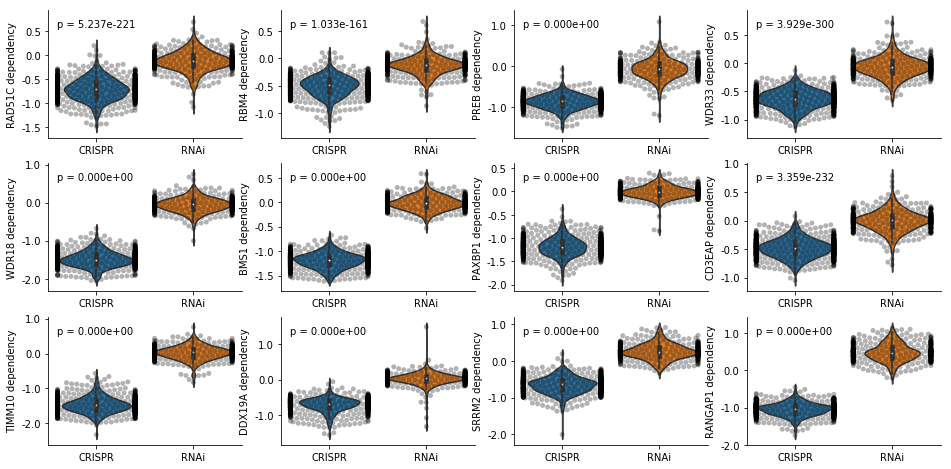

In [40]:
##########################################################################################
######################################### point 9 ########################################
##########################################################################################

### crispr vs RNAi ###


ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='essential_genes').values[:,0]
com_ess = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='pan_dependent_genes').values[:,0]
comm_ess_drive = tc.get(name='demeter2-drive-0591', version=12, file='pan_dependent_genes').values[:,0]
pan_dependent_genes_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='pan_dependent_genes').values[:,0]

look_ats = set(set(com_ess) & set(gene_effect_rnai_drive.columns)) - set(comm_ess_drive) & set(pan_dependent_genes_rnai_achilles)

from scipy import stats
fig,ax = plt.subplots(3,4,figsize=(16,8))
from matplotlib.ticker import FormatStrFormatter

i=0
j=0

for gene in gene_effect_rnai_drive.loc[:,look_ats].median().sort_values().iloc[-12:].index:


    temp = pd.DataFrame(gene_effect_crispr_achilles.loc[:,gene])

    temp['crispr'] = 'CRISPR'


    temp = pd.concat([temp,pd.DataFrame(gene_effect_rnai_drive.loc[:,gene])])

    temp.loc[gene_effect_rnai_drive.loc[:,gene].index,'crispr'] = 'RNAi'


    sns.violinplot(data=temp,y=gene,x='crispr',ax=ax[i,j])
    sns.swarmplot(data=temp,y=gene,x='crispr',alpha=.3,color='black',ax=ax[i,j])

    plotting.simpleaxis(ax[i,j])

    ax[i,j].set_ylabel(gene.split(' ')[0] + ' dependency')
    ax[i,j].set_xlabel('')
    
    ax[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    
    tt,p_val = stats.ttest_ind(temp[temp.loc[:,'crispr'] == 'CRISPR'].iloc[:,0].dropna(),temp[temp.loc[:,'crispr'] == 'RNAi'].iloc[:,0].dropna())
    ax[i,j].legend(title='p = '+ ("{:.3e}".format(p_val)),frameon=False)
    
    
    j+=1
    if j ==4:
        i+=1
        j=0



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


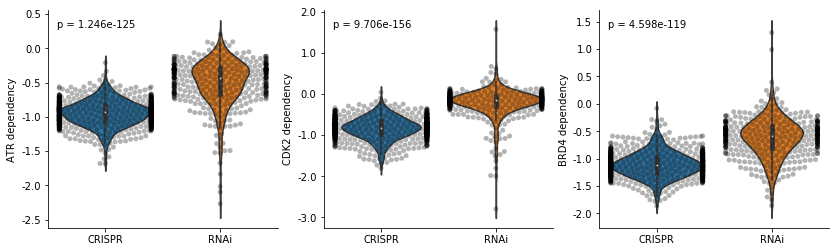

In [41]:
### now only looking at ATR, CDK2, BRD4 ###

gene_effect_rnai_drive.columns = gene_effect_rnai_drive.columns.str.split(' ').str[0]
gene_effect_crispr_achilles.columns = gene_effect_crispr_achilles.columns.str.split(' ').str[0]

fig,axx = plt.subplots(1,3,figsize=(14,4))

i=0

for gene in ['ATR','CDK2','BRD4']:


    temp = pd.DataFrame(gene_effect_crispr_achilles.loc[:,gene])

    temp['crispr'] = 'CRISPR'


    temp = pd.concat([temp,pd.DataFrame(gene_effect_rnai_drive.loc[:,gene])])

    temp.loc[gene_effect_rnai_drive.loc[:,gene].index,'crispr'] = 'RNAi'


    sns.violinplot(data=temp,y=gene,x='crispr',ax=axx[i])
    sns.swarmplot(data=temp,y=gene,x='crispr',alpha=.3,color='black',ax=axx[i])

    plotting.simpleaxis(axx[i])

    axx[i].set_ylabel(gene.split(' ')[0] + ' dependency')
    axx[i].set_xlabel('')
    
    axx[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    tt,p_val = stats.ttest_ind(temp[temp.loc[:,'crispr'] == 'CRISPR'].iloc[:,0].dropna(),temp[temp.loc[:,'crispr'] == 'RNAi'].iloc[:,0].dropna())
    axx[i].legend(title='p = '+ ("{:.3e}".format(p_val)),frameon=False)
    
    
    i+=1
    
